Projeto - Aplicação de Redes Neurais

Objetivo: O aluno deverá ser capaz de realizar uma análise completa dos dados e projetar uma rede neural para resolver o problema. Avaliar os resultados obtidos através das métricas de classificação Problema: De posse de dados que correspondem a sinais de transitórios de eletrodomésticos (sinais obtidos em uma janela de 2s ao se ligar equipamento) e que foram rotulados em 7 diferentes classes, o aluno deverá realizar os seguintes passos:

1.Carregar os dados e realizar a limpeza dos dados (se necessário).

2.Visualizar os dados para compreensão (dica: plotar 1 exemplo de cada Classe). Como na Figura 1 , abaixo, que representa um eletrodoméstico da Classe 1.

3.Como é um problema muticlasse, o aluno deverá transformar os labels para uma representação correta.

4.Preparar os dados para serem apresentados à ML.

5.Construir a rede neural com seus respectivos parâmetros (taxa de aprendizado, número de camadas intermediárias, número de neurônios, batch_size etc). O aluno deve propor uma estratégia para determinar esses parâmetros.

5.Testar e validar os resultados.

6. Avaliar o uso de PCA (Análise de Componentes Principais) para visualização dos dados e também como speed-up da ML (para fins de classificação).

Conclusão obs.: Esses dados estão desatualizados, não necessariamente representam os eletrodomésticos atuais. Mas, esses estudos ainda são atuais e continuam usando recursos de IA em suas soluções.

In [1]:
# Importando as bibliotecas:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [2]:
url = (r'db.csv')
df = pd.read_csv(url)
df.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2


In [3]:
df.describe()


,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,11.114000,7.974000,8.154000,7.334000,7.374000,6.834000,7.134000,6.874000,7.054000,6.594000,...,0.114000,-0.14600,-0.146000,0.154000,0.014000,0.374000,-0.20600,-0.146000,-0.186000,3.140000
std,10.187807,9.012776,8.899937,8.958318,8.458134,8.301816,8.230796,8.317599,8.269182,7.937996,...,2.253057,0.86292,0.829497,1.009442,1.114779,0.969548,0.78757,1.046004,0.838411,1.608186
min,-10.150000,-6.300000,-6.300000,-6.300000,-5.300000,-3.500000,-4.300000,-6.300000,-6.300000,-4.300000,...,-2.500000,-2.40000,-2.050000,-2.500000,-2.150000,-2.500000,-2.30000,-2.500000,-2.050000,1.000000
25%,0.650000,0.450000,0.700000,0.450000,0.650000,0.450000,0.600000,0.850000,0.650000,0.650000,...,-0.700000,-0.75000,-0.700000,-0.550000,-0.800000,-0.100000,-0.70000,-0.750000,-0.700000,2.000000
50%,11.925000,5.575000,4.950000,4.300000,3.600000,3.050000,3.300000,3.325000,3.225000,3.850000,...,-0.300000,-0.07500,-0.200000,0.275000,-0.075000,0.400000,-0.32500,-0.025000,-0.275000,3.000000
75%,21.250000,14.900000,17.450000,16.950000,14.900000,13.000000,14.000000,13.000000,11.950000,10.950000,...,0.300000,0.45000,0.550000,0.700000,0.700000,0.850000,0.35000,0.450000,0.250000,4.000000
max,25.850000,25.450000,26.200000,25.200000,25.200000,25.000000,24.200000,25.200000,26.200000,25.200000,...,13.550000,1.70000,1.500000,2.650000,3.500000,3.800000,1.35000,1.850000,2.500000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 201 entries, t0 to Classes
dtypes: float64(200), int64(1)
memory usage: 157.2 KB


In [5]:
df.isna().sum()

t0         0
t1         0
t2         0
t3         0
t4         0
          ..
t196       0
t197       0
t198       0
t199       0
Classes    0
Length: 201, dtype: int64

In [6]:
# Classes e instancias do dataset:
df.groupby('Classes').size()

Classes
1    16
2    22
3    30
4     8
5    16
6     4
7     4
dtype: int64

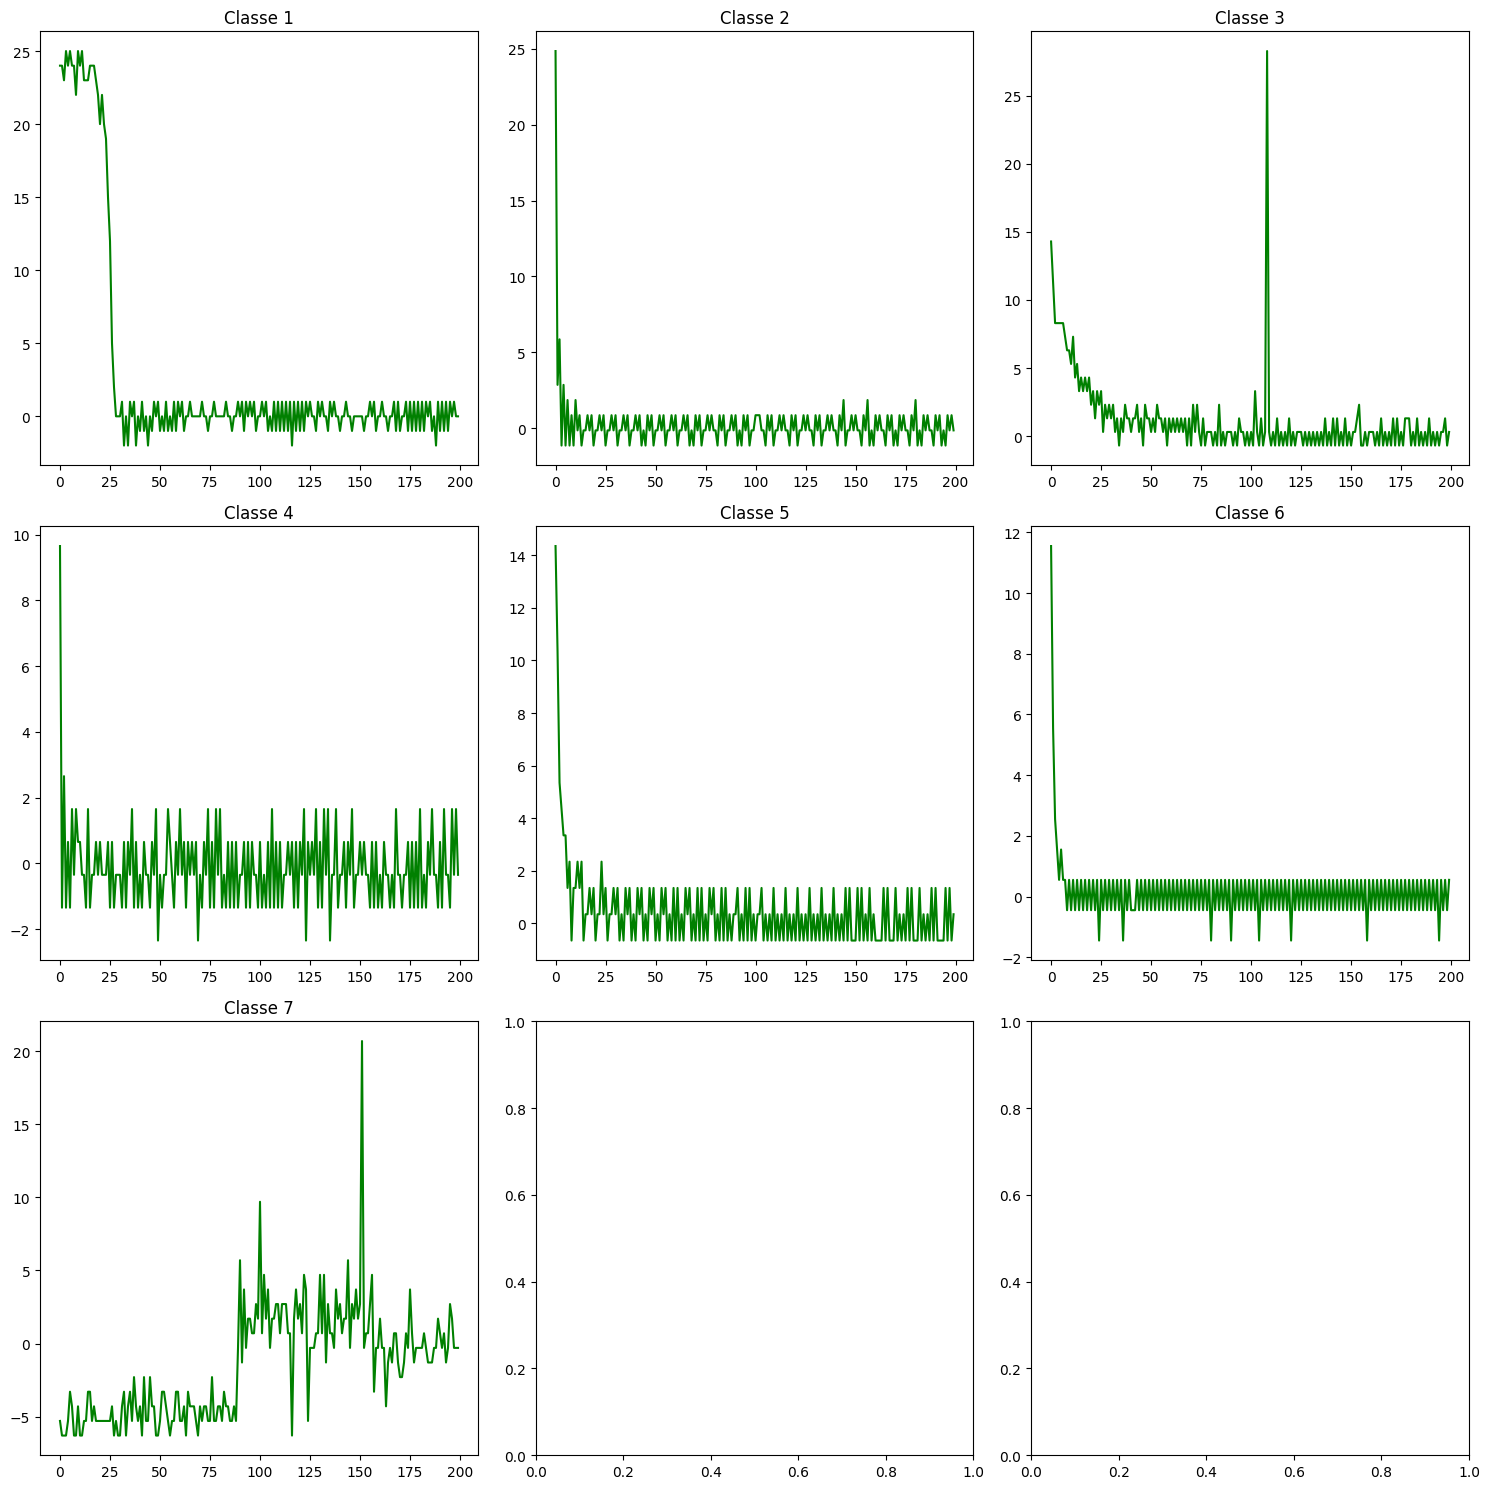

In [7]:
#Plotando um exemoplo de cada classe:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axs.flat):
    classe = i + 1
    exemplos_classe = df[df['Classes'] == classe]
    if not exemplos_classe.empty:
        exemplo = exemplos_classe.iloc[0]
        ax.plot(exemplo.drop('Classes').values, color='green')
        ax.set_title(f'Classe {classe}')

plt.tight_layout()
plt.show()
     

In [9]:
#Criando o modelo abaixo:
df2 = df

In [12]:
#Inicialize o codificador para separar as classes:
onehot_encoder = OneHotEncoder(sparse=False)

# Ajuste e transforme os dados
categorias_cod = onehot_encoder.fit_transform(df2[['Classes']])

print(categorias_cod)

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.

c:\Users\katia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
# Definindo  X e Y:
X = df.drop(columns= 'Classes') 
y = categorias_cod

In [15]:
# Dividindo entre treino e teste (20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=20)

In [16]:
#Normalizando os dados:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Treinando o classificador MLP sem usar o gridsearch para achar os hiperparametros:
clf = MLPClassifier(random_state=1,hidden_layer_sizes= (5,),learning_rate_init=0.01, max_iter=1000,
                    verbose=True).fit(X_train, y_train)

Iteration 1, loss = 5.37756854
Iteration 2, loss = 4.94897661
Iteration 3, loss = 4.64329869
Iteration 4, loss = 4.34067701
Iteration 5, loss = 4.06480541
Iteration 6, loss = 3.82602121
Iteration 7, loss = 3.61793320
Iteration 8, loss = 3.41288645
Iteration 9, loss = 3.21158076
Iteration 10, loss = 3.01628985
Iteration 11, loss = 2.83369129
Iteration 12, loss = 2.67773185
Iteration 13, loss = 2.54345195
Iteration 14, loss = 2.42056408
Iteration 15, loss = 2.31145952
Iteration 16, loss = 2.21733760
Iteration 17, loss = 2.13382604
Iteration 18, loss = 2.05869445
Iteration 19, loss = 1.98898568
Iteration 20, loss = 1.92775683
Iteration 21, loss = 1.86975188
Iteration 22, loss = 1.81469981
Iteration 23, loss = 1.76273283
Iteration 24, loss = 1.71425517
Iteration 25, loss = 1.66867336
Iteration 26, loss = 1.62510007
Iteration 27, loss = 1.58256570
Iteration 28, loss = 1.54055794
Iteration 29, loss = 1.50017714
Iteration 30, loss = 1.46003999
Iteration 31, loss = 1.42201639
Iteration 32, los

In [18]:
# Acuracia do modelo no treino
clf.score(X_train,y_train)
     

0.925

In [19]:
#Acuracia no teste:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy}')
     

Acurácia no conjunto de teste: 0.8


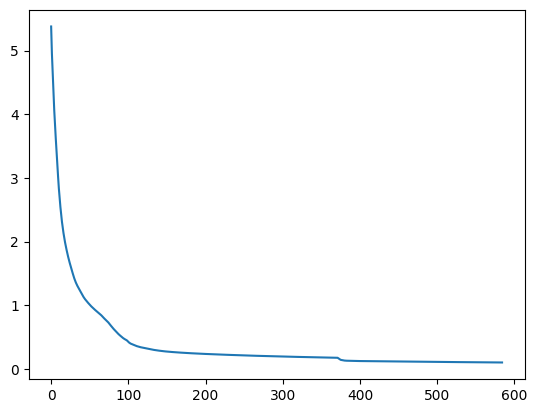

In [20]:
# Exibindo o gráfico da loss function durante o treinamento: foi melhoirando como o esperado
plt.plot(clf.loss_curve_)
plt.show()

In [21]:
# Ultilizando o grid search para achar os melhores parametros e melhorar a acuracia do modelo:
parameters = {'random_state' : [42],
              'activation' : ['relu'],
              'solver': ['lbfgs','sgd','adam'],
              'hidden_layer_sizes' : [2,4,8,16,32,64],
              'learning_rate_init': [0.005,0.01,0.02,0.05]
              }
# Instanciando o GridSearch:
grid_search = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)

# Ajustando a busca aos dados:
grid_search.fit(X_train, y_train)
     

Iteration 1, loss = 5.46795696
Iteration 2, loss = 5.22599358
Iteration 3, loss = 4.91779629
Iteration 4, loss = 4.58202702
Iteration 5, loss = 4.24905173
Iteration 6, loss = 3.93266066
Iteration 7, loss = 3.64050497
Iteration 8, loss = 3.38105878
Iteration 9, loss = 3.15723035
Iteration 10, loss = 2.96096605
Iteration 11, loss = 2.78489786
Iteration 12, loss = 2.62621762
Iteration 13, loss = 2.48311244
Iteration 14, loss = 2.35438959
Iteration 15, loss = 2.23884800
Iteration 16, loss = 2.13600693
Iteration 17, loss = 2.04369695
Iteration 18, loss = 1.96111991
Iteration 19, loss = 1.88674459
Iteration 20, loss = 1.81956842
Iteration 21, loss = 1.75829565
Iteration 22, loss = 1.70170146
Iteration 23, loss = 1.64843265
Iteration 24, loss = 1.59722624
Iteration 25, loss = 1.54889803
Iteration 26, loss = 1.50325794
Iteration 27, loss = 1.46021710
Iteration 28, loss = 1.41936520
Iteration 29, loss = 1.38036942
Iteration 30, loss = 1.34224781
Iteration 31, loss = 1.30527743
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(5,),
                                     learning_rate_init=0.01, max_iter=1000,
                                     random_state=1, verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [2, 4, 8, 16, 32, 64],
                         'learning_rate_init': [0.005, 0.01, 0.02, 0.05],
                         'random_state': [42],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [22]:
# Mostrando os melhores parâmetros obtidos pelo GridSearch:
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'activation': 'relu', 'hidden_layer_sizes': 32, 'learning_rate_init': 0.005, 'random_state': 42, 'solver': 'sgd'}


In [23]:
#Acuracia do modelo com o gridsearch:
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Acurácia do modelo com os melhores parâmetros:", accuracy)
#Perecebemos que melhorou

Acurácia do modelo com os melhores parâmetros: 0.9


In [24]:
# Calculando a matriz de confusão:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[3 0 0 0 0]
 [0 5 0 0 0]
 [0 0 7 0 0]
 [0 0 0 4 0]
 [1 0 0 0 0]]


Veja que a matriz confusão nao faz referencia as categorias 5 e 6, ou seja nao há  previsão exata para essas categorias, esse problemas poderia ser resolvido ajustando os dados, porem nao será feito aqui

In [25]:
# Inicializando o PCA para redução de dimensionalidade (com 2 dimensões):
pca = PCA(n_components=2)

# Aplicar PCA aos dados de treinamento e teste
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
# Treinando e avaliando o modelo de classificação com PCA com os parametros do gridsearch
clf_com_pca = MLPClassifier(random_state=42, hidden_layer_sizes=(32,), learning_rate_init=0.005, max_iter=1000)
clf_com_pca.fit(X_train_pca, y_train)
accuracy_com_pca = clf_com_pca.score(X_test_pca, y_test)
print("Acurácia do modelo com PCA:", accuracy_com_pca)
     

Acurácia do modelo com PCA: 0.7


c:\Users\katia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


O modelo com redução de dimensionalidade apresentou queda na acuracia ao reduzirmos a apenas duas dimensionalidades.